In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import logging, os
import pandas as pd
import time
from tensorflow.keras.models import load_model
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, Label
from PIL import Image
import base64, io, IPython
from PIL import Image as PILImage

BASE_PATH = "../../../../../local_data/practice/tfds/"
DATA_PATH = "../../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"table_view/"
os.system("mkdir -p " + OUTPUT_PATH)


# Load the dataset
(train_dataset, test_dataset), metadata = tfds.load(
    'cats_vs_dogs',
    data_dir=DATA_PATH,
    # split=['train[:80%]', 'train[80%:]'],
    split=['train[:80%]', 'train[99%:]'],
    with_info=True,
    as_supervised=True
)

print(f"Number of test samples: {test_dataset.cardinality()}")
print(metadata.features["label"].names[0])

2025-07-13 21:18:47.601261: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-13 21:18:47.628680: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of test samples: 233
cat


In [2]:
images=[]
alllabels=np.empty(0)
for i, (image, label) in enumerate(test_dataset.take(-1)):
    images.append(image)
    alllabels = np.append(alllabels, label.numpy().flatten())

# plt.imshow(images[2])
# plt.title(int(label))
# plt.axis("off")


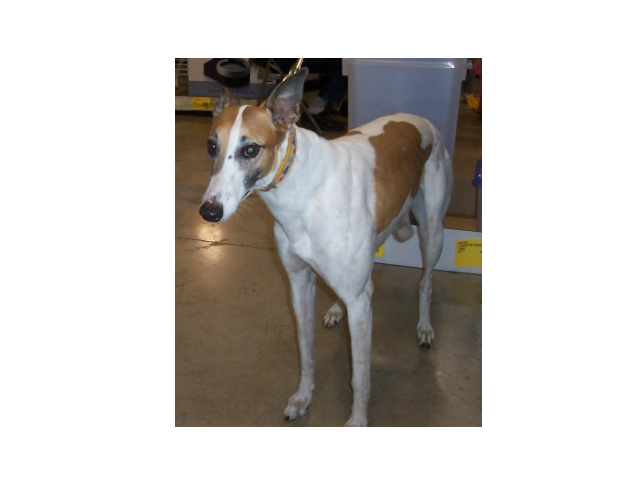

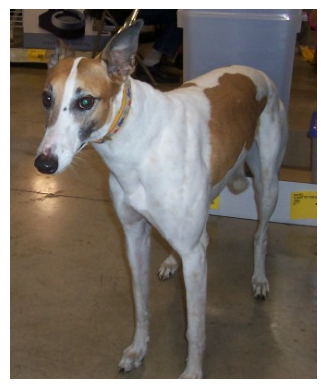

In [3]:
plt.imshow(images[2])
plt.axis("off")
tfds_img_buf = io.BytesIO()
plt.savefig(tfds_img_buf, format='png')
image = Image.open(tfds_img_buf)
image.save(tfds_img_buf, format='PNG')
encoded_string = base64.b64encode(tfds_img_buf.getvalue()).decode()

label=1
prediction=0

html=[]
html.append('<table>')
html.append('<tr><th>Image</th> <th>Label</th> <th>Prediction</th></tr>')
html.append('<tr> <td style="width:150px">')
html.append('<img src="data:image/png;base64,{} " />'.format(encoded_string))
html.append('</td>')
html.append('<td>')
html.append(str(label)) 
html.append(" ("+metadata.features["label"].names[label]+" )") 
html.append('<td>')  
html.append('<td>')
html.append(str(prediction)) 
html.append(" ("+metadata.features["label"].names[prediction]+" )") 
html.append('<td>')  
html.append('</tr></table>')

# html1='<table><tr> \
# <td> <img src="data:image/png;base64,{} "/> </td> \
# <td> <img src="puppy.jpg" alt="Drawing" style="width: 250px;"/> </td> \

myhtml = ''.join(html)
# print(myhtml)
IPython.display.HTML(myhtml)